In [1]:
# More examples:
# https://keras.io/examples/vision/mnist_convnet/
# https://www.kaggle.com/code/ektasharma/simple-cifar10-cnn-keras-code-with-88-accuracy
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
import keras.utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import pickle
import pandas as pd

# Fashion MNIST

In [2]:
# Fashion MNIST
from tensorflow.keras.datasets.fashion_mnist import load_data
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


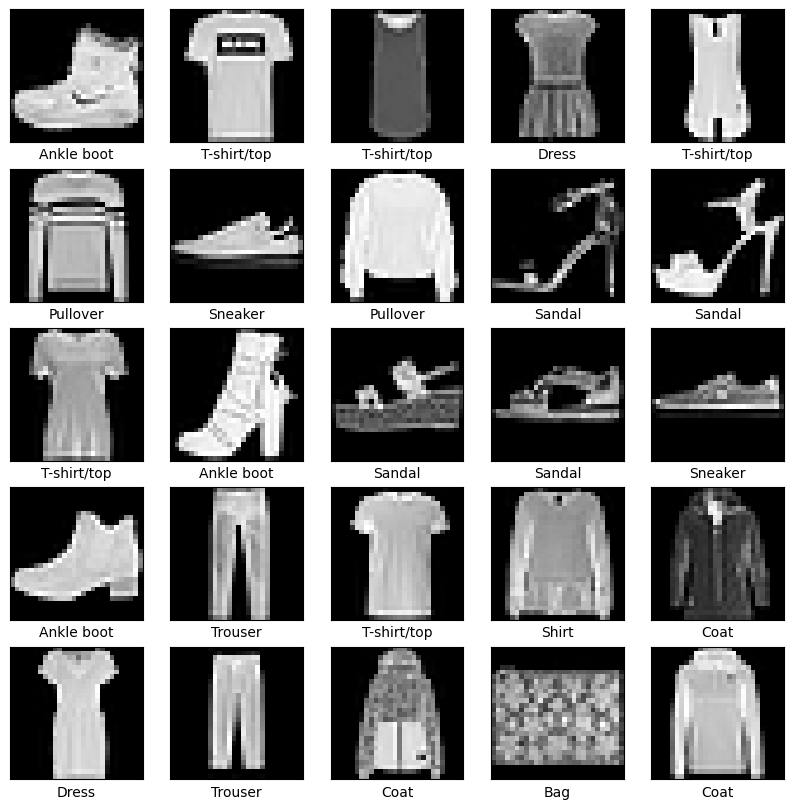

In [3]:
# Visualize some of the images from the training dataset'
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])

plt.show()

# Fashion MNIST - FNN

In [4]:
# FNN
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28 * 28 * 1))
x_test = x_test.reshape((x_test.shape[0], 28 * 28 * 1))

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 784, 1)
60000 train samples
10000 test samples


In [5]:
# define the 784-256-128-10 FNN architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))

# Comment out the following line if you like to make the FNN smaller
model.add(Dense(128, activation="relu"))

# Comment out the following line if you like to make the FNN bigger
# model.add(Dense(64, activation="relu"))

model.add(Dense(10, activation="softmax"))
model.summary()

/Library/Python/3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the FNN
batch_size = 64
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# if training takes long time, you can go to the next cell and load the pretrained model
historyFNN = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
historyFN2 = historyFNN.history

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7692 - loss: 0.6587 - val_accuracy: 0.8547 - val_loss: 0.4017
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8654 - loss: 0.3687 - val_accuracy: 0.8577 - val_loss: 0.4034
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8763 - loss: 0.3348 - val_accuracy: 0.8665 - val_loss: 0.3607
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8857 - loss: 0.3050 - val_accuracy: 0.8832 - val_loss: 0.3249
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8933 - loss: 0.2832 - val_accuracy: 0.8800 - val_loss: 0.3302
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8991 - loss: 0.2685 - val_accuracy: 0.8842 - val_loss: 0.3194
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9011 - loss: 0.2659 - val_accuracy: 0.8890 - val_loss: 0.3135
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2471 - val_accuracy: 0.

In [7]:
model.save('pretrained_models/model_FNN_FashionMNIST.h5')
np.save('pretrained_models/history_FNN_FashionMNIST.npy',historyFNN.history)

# if training takes long time, you can go to the next two lines and load the pretrained model and history
model = load_model('pretrained_models/model_FNN_FashionMNIST.h5') 
historyFNN2 = np.load('pretrained_models/history_FNN_FashionMNIST.npy',allow_pickle='TRUE').item()

In [8]:
# Evaluate the test performance
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3396547734737396
Test accuracy: 0.8863999843597412


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


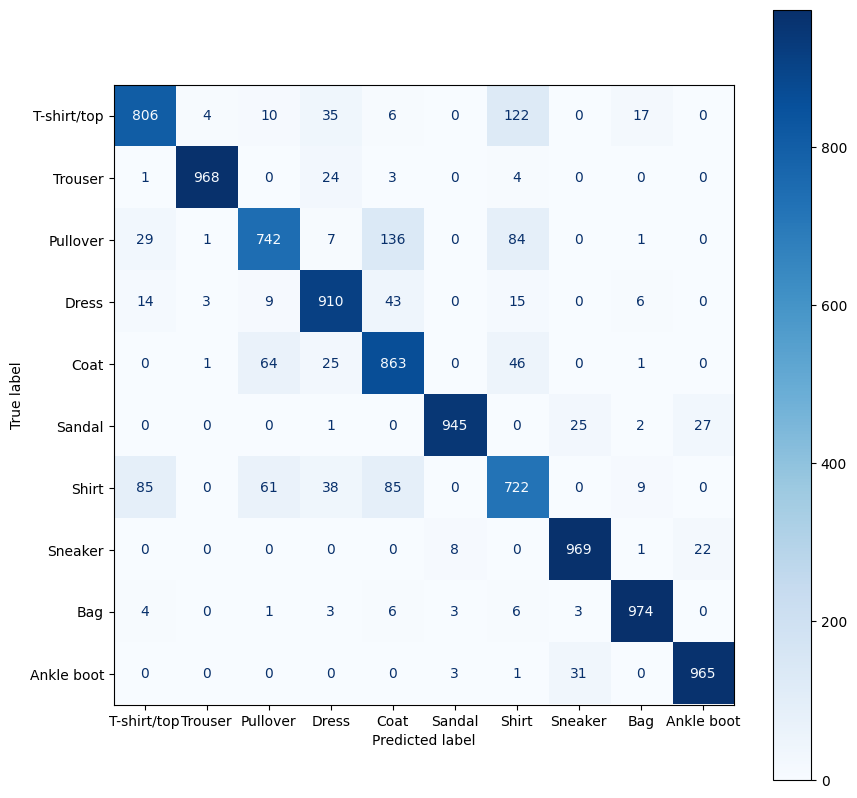

In [9]:
# Calculate and show the confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

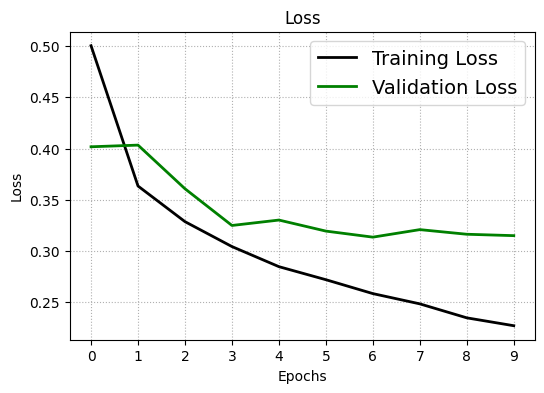

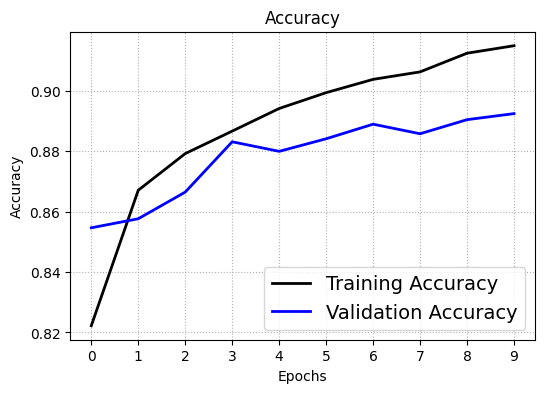

In [10]:
# Loss curve
epochs = 10
plt.figure(figsize=[6,4])
plt.plot(historyFNN2['loss'], 'black', linewidth=2.0)
plt.plot(historyFNN2['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
a = plt.title('Loss', fontsize=12)
aa = plt.xticks(np.arange(0,epochs, 1)) 
plt.grid(linestyle='dotted')

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(historyFNN2['accuracy'], 'black', linewidth=2.0)
plt.plot(historyFNN2['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
a = plt.title('Accuracy', fontsize=12)
aa = plt.xticks(np.arange(0,epochs, 1)) 
plt.grid(linestyle='dotted')

# Fashion MNIST - CNN

In [11]:
# CNN
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
#         Uncomment the following two lines to add more convolutional and maxpooling layers 
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN
batch_size = 512
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# if training takes long time, you can go to the next cell and load the pretrained model
historyCNN = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
historyCNN2 = historyCNN.history

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6856 - loss: 1.2275 - val_accuracy: 0.9307 - val_loss: 0.2467
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9094 - loss: 0.3105 - val_accuracy: 0.9538 - val_loss: 0.1744
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9327 - loss: 0.2303 - val_accuracy: 0.9645 - val_loss: 0.1334
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9494 - loss: 0.1765 - val_accuracy: 0.9712 - val_loss: 0.1117
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9565 - loss: 0.1534 - val_accuracy: 0.9753 - val_loss: 0.0970
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9611 - loss: 0.1317 - val_accuracy: 0.9772 - val_loss: 0.0890
Epoch 7/10
 99/106 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9643 - loss: 0.1227

In [ ]:
model.save('pretrained_models/model_CNN_FashionMNIST.h5')
np.save('pretrained_models/history_CNN_FashionMNIST.npy',historyCNN.history)

# if training takes long time, you can go to the next two lines and load the pretrained model and history
model = load_model('pretrained_models/model_CNN_FashionMNIST.h5') 
historyCNN2 = np.load('pretrained_models/history_CNN_FashionMNIST.npy',allow_pickle='TRUE').item()

In [ ]:
# Evaluate the test performance
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# Calculate and show the confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Loss curve
epochs = 10
plt.figure(figsize=[6,4])
plt.plot(historyCNN2['loss'], 'black', linewidth=2.0)
plt.plot(historyCNN2['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
a = plt.title('Loss', fontsize=12)
aa = plt.xticks(np.arange(0,epochs, 1)) 
plt.grid(linestyle='dotted')

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(historyCNN2['accuracy'], 'black', linewidth=2.0)
plt.plot(historyCNN2['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
a = plt.title('Accuracy', fontsize=12)
aa = plt.xticks(np.arange(0,epochs, 1)) 
plt.grid(linestyle='dotted')

# CIFAR-10

In [ ]:
# CIFAR - CNN
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# If training is too small, reduce datasset sizes:
# train_images = train_images[0:10000]
# train_labels = train_labels[0:10000] 
# test_images = test_images[0:2000]
# test_labels = test_labels[0:2000]

x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_test, y_test  = shuffle(x_test, y_test, random_state=0)

# Checking the number of rows (records) and columns (features)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# Visualizing some of the images from the training dataset

# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])

plt.show()

In [ ]:
# Converting the pixels data to float type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
x_train = x_train / 255
x_test = x_test / 255 

# One hot encoding the target class (labels)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Create a sequential model and add CNN layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

# Remove the following 6 lines to make training faster
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

# Remove the following 6 lines to make training faster
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

In [ ]:
# Train the CNN - if training takes long time, go to the next cell and load the pretrained model and history
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
filepath = 'my_best_model.keras'
checkpoint = ModelCheckpoint(filepath=filepath, 
                                monitor='val_loss',
                                     verbose=1, 
                                     save_best_only=True,
                                     mode='min')
callbacks = [checkpoint]

batch_size = 64
epochs = 10

historyCIFAR = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test), callbacks=callbacks)
historyCIFAR2 = historyCIFAR.history

In [ ]:
model.save('pretrained_models/model_CIFAR_10epochs.h5')
np.save('pretrained_models/history_CIFAR_10epochs.npy', historyCIFAR.history)

# if training takes long time, you can go to the next two lines and load the pretrained model and history
model = load_model('pretrained_models/model_CIFAR_10epochs.h5')
historyCIFAR2 = np.load('pretrained_models/history_CIFAR_10epochs.npy',allow_pickle='TRUE').item()
# model = load_model('pretrained_models\model_CIFAR_20epochs.h5')
# model = load_model('pretrained_models\model_CIFAR_50epochs.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# Calculate and show the confusion matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fig, ax = plt.subplots(figsize=(7,7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Loss curve
epochs = 10
plt.figure(figsize=[6,4])
plt.plot(historyCIFAR2['loss'], 'black', linewidth=2.0)
plt.plot(historyCIFAR2['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
aa = plt.xticks(np.arange(0,epochs, 1)) 
plt.grid(linestyle='dotted')

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(historyCIFAR2['accuracy'], 'black', linewidth=2.0)
plt.plot(historyCIFAR2['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)
aa = plt.xticks(np.arange(0,epochs, 1)) 
plt.grid(linestyle='dotted')

In [ ]:
# Plotting the Actual vs. Predicted results

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Making the Predictions
# y_pred = model.predict(x_test)

# Converting the predictions into label index 
pred_classes = np.argmax(y_pred, axis=1)
# print(pred_classes)

num_x = 5
num_y = 5
start_count = 0
fig, axes = plt.subplots(num_x, num_y, figsize=(15,15))
axes = axes.ravel()
count = 0
for i in np.arange(start_count, start_count + num_x*num_y ):
    axes[count].imshow(x_test[i])
    axes[count].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[count].axis('off')
    count += 1
    plt.subplots_adjust(wspace=1)